#Async Exercise: Health site near you


In [ ]:
!pip install geopandas
!pip install --upgrade geopandas

In [ ]:
!pip install geoplot

In [ ]:
!pip install rtree pygeos
!pip install --upgrade rtree pygeos
!apt install python3-rtree 

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import pandas as pd
import geopandas as gpd
import geoplot.crs as gcrs
import geoplot as gplt
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


Populating the interactive namespace from numpy and matplotlib


In [5]:
import rtree
import pygeos

In [36]:
gpd.read_file?

In [6]:
ph = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/DATASCI/gadm36_PHL_1.shp')
ph.head(50)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


(116.444486621, 127.08919715899998, 3.7627797585000007, 21.894300891500002)

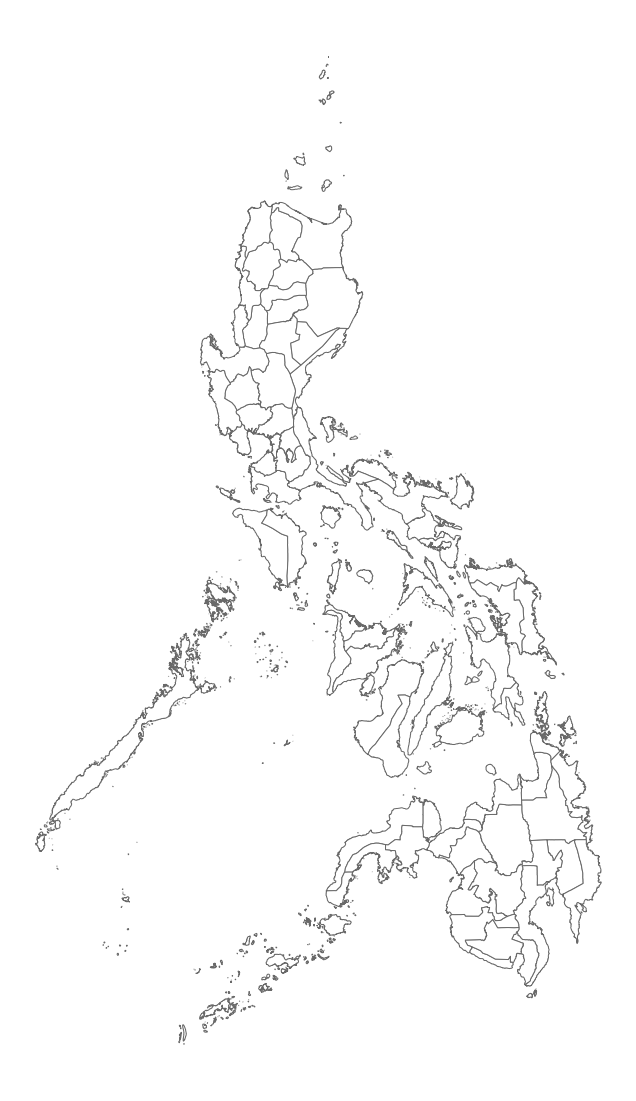

In [7]:
ax = ph.plot(figsize=(30,20), color="w", edgecolor="dimgray")

ax.axis('off')

In [8]:
healthsites = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/DATASCI/philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,,,,6fb6d5acfc8841b9a093117a94750833,,,,,,,1.0,,2017-03-03T08:20:18,,,,MedCore,,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,,,,d658390a61644ef4a3197d66adf2ee8f,,,,,,,1.0,,2019-05-21T22:03:08,,,,City Health Office - Iligan City,,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,,,+6378 3020000;+6378 3043789;+6378 304 1410;+63...,d6b4acf850ac4a66a8331aa8fde2c9f1,,24/7,,,,,1.0,,2020-02-22T13:37:54,,,Tuguegarao,Cagayan Valley Medical Center,,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,,,,c95ed8224a844508b7e2539345b8d7a3,,Mo-Su 07:00-22:00,,,,,4.0,,2020-06-08T05:58:39,,,,Mercury Drug,,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,,,,38170810204c4c2bb7753171ab92e186,,,,,,,1.0,yes,2018-06-25T10:54:52,,,,Se単or Santo Ni単o Hospital,,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


In [9]:
healthsites.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
print(healthsites.crs)
print(ph.crs)

epsg:4326
epsg:4326


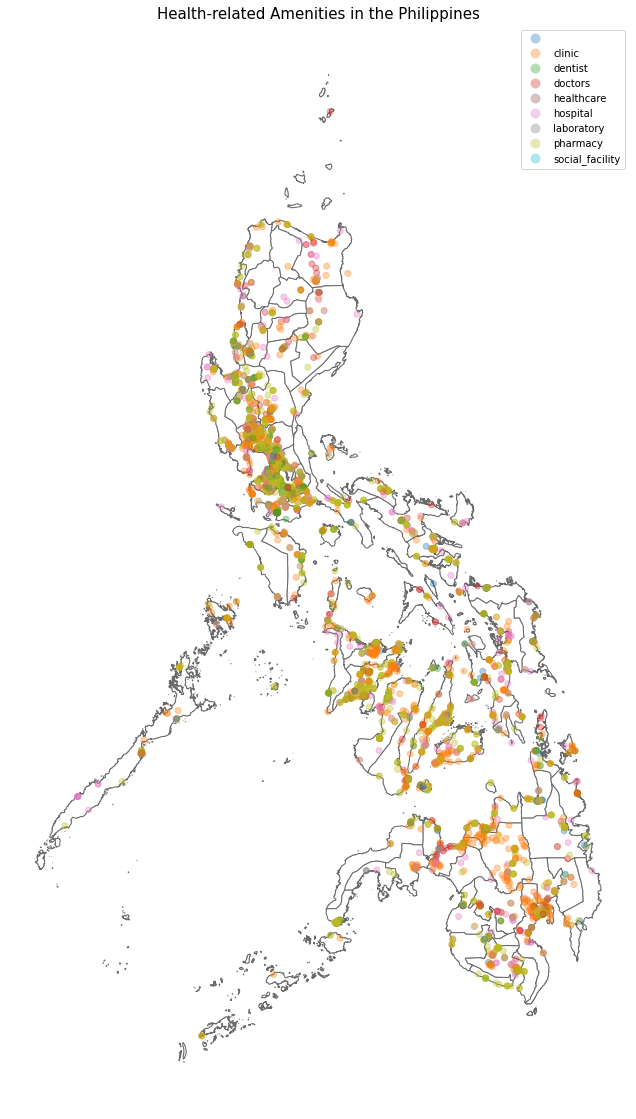

In [11]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

In [16]:
healthsites['amenity'].value_counts()

pharmacy           4078
clinic             2673
hospital           2085
dentist             698
doctors             441
                    393
laboratory           33
social_facility       3
healthcare            1
Name: amenity, dtype: int64

In [18]:
pharmacydata= pd.DataFrame()
pharmacydata= pharmacydata.append(healthsites.loc[healthsites['amenity']=='pharmacy'])
pharmacydata= pharmacydata.reset_index(drop=True)

clinicdata= pd.DataFrame()
clinicdata= clinicdata.append(healthsites.loc[healthsites['amenity']=='clinic'])
clinicdata= clinicdata.reset_index(drop=True)

hospitaldata= pd.DataFrame()
hospitaldata= hospitaldata.append(healthsites.loc[healthsites['amenity']=='hospital'])
hospitaldata= hospitaldata.reset_index(drop=True)

dentistdata= pd.DataFrame()
dentistdata= dentistdata.append(healthsites.loc[healthsites['amenity']=='dentist'])
dentistdata= dentistdata.reset_index(drop=True)

doctorsdata= pd.DataFrame()
doctorsdata= doctorsdata.append(healthsites.loc[healthsites['amenity']=='doctors'])
doctorsdata= doctorsdata.reset_index(drop=True)

unkdata= pd.DataFrame()
unkdata= unkdata.append(healthsites.loc[healthsites['amenity']==''])
unkdata= unkdata.reset_index(drop=True)

laboratorydata= pd.DataFrame()
laboratorydata= laboratorydata.append(healthsites.loc[healthsites['amenity']=='laboratory'])
laboratorydata= laboratorydata.reset_index(drop=True)

social_facilitydata= pd.DataFrame()
social_facilitydata= social_facilitydata.append(healthsites.loc[healthsites['amenity']=='social_facility'])
social_facilitydata= social_facilitydata.reset_index(drop=True)

healthcaredata= pd.DataFrame()
healthcaredata= healthcaredata.append(healthsites.loc[healthsites['amenity']=='healthcare'])
healthcaredata= healthcaredata.reset_index(drop=True)

##Health-related amenities

###Metropolitan Manila

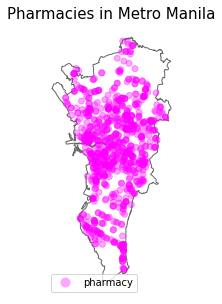

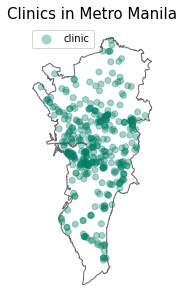

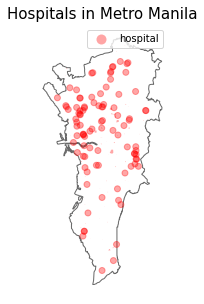

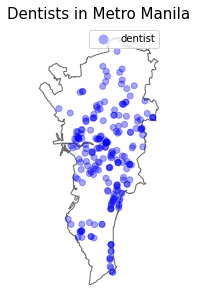

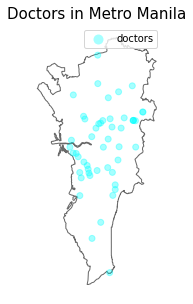

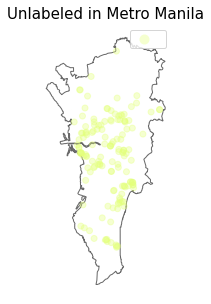

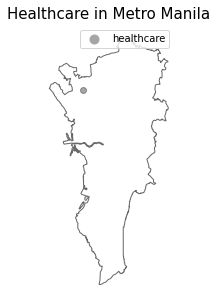

In [48]:
mm = ph[ph.NAME_1=="Metropolitan Manila"]

mm_within = gpd.sjoin(pharmacydata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="spring", alpha=0.35, legend=True)
ax.set_title('Pharmacies in Metro Manila', fontsize=15)
ax.axis('off');

mm_within = gpd.sjoin(clinicdata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="summer", alpha=0.35, legend=True)
ax.set_title('Clinics in Metro Manila', fontsize=15)
ax.axis('off');

mm_within = gpd.sjoin(hospitaldata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="autumn", alpha=0.35, legend=True)
ax.set_title('Hospitals in Metro Manila', fontsize=15)
ax.axis('off');

mm_within = gpd.sjoin(dentistdata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="winter", alpha=0.35, legend=True)
ax.set_title('Dentists in Metro Manila', fontsize=15)
ax.axis('off');

mm_within = gpd.sjoin(doctorsdata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="cool", alpha=0.35, legend=True)
ax.set_title('Doctors in Metro Manila', fontsize=15)
ax.axis('off');

mm_within = gpd.sjoin(unkdata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="Wistia", alpha=0.35, legend=True)
ax.set_title('Unlabeled in Metro Manila', fontsize=15)
ax.axis('off');

#0 Laboratories in Metro Manila

#0 Social Facilities in Metro Manila

mm_within = gpd.sjoin(healthcaredata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="gist_heat", alpha=0.35, legend=True)
ax.set_title('Healthcare in Metro Manila', fontsize=15)
ax.axis('off');

###Ilocos Norte

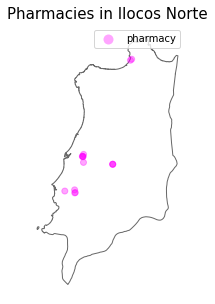

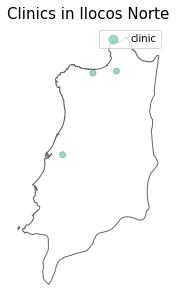

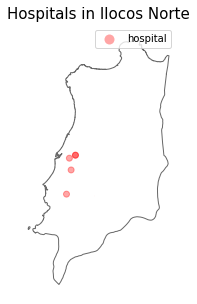

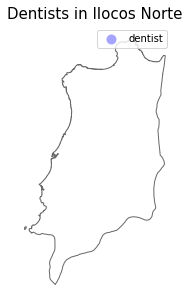

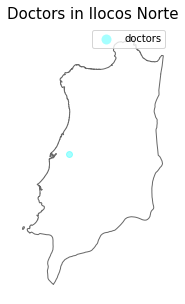

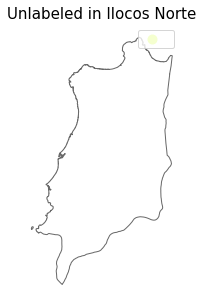

In [49]:
mm = ph[ph.NAME_1=="Ilocos Norte"]

mm_within = gpd.sjoin(pharmacydata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="spring", alpha=0.35, legend=True)
ax.set_title('Pharmacies in Ilocos Norte', fontsize=15)
ax.axis('off');

mm_within = gpd.sjoin(clinicdata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="summer", alpha=0.35, legend=True)
ax.set_title('Clinics in Ilocos Norte', fontsize=15)
ax.axis('off');

mm_within = gpd.sjoin(hospitaldata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="autumn", alpha=0.35, legend=True)
ax.set_title('Hospitals in Ilocos Norte', fontsize=15)
ax.axis('off');

mm_within = gpd.sjoin(dentistdata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="winter", alpha=0.35, legend=True)
ax.set_title('Dentists in Ilocos Norte', fontsize=15)
ax.axis('off');

mm_within = gpd.sjoin(doctorsdata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="cool", alpha=0.35, legend=True)
ax.set_title('Doctors in Ilocos Norte', fontsize=15)
ax.axis('off');

mm_within = gpd.sjoin(unkdata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="Wistia", alpha=0.35, legend=True)
ax.set_title('Unlabeled in Ilocos Norte', fontsize=15)
ax.axis('off');

#0 Laboratories in Ilocos Norte

#0 Social Facilities in Ilocos Norte

#0 Healthcare in Ilocos Norte

###Occidental Mindoro

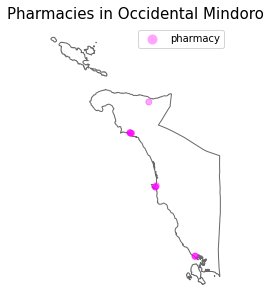

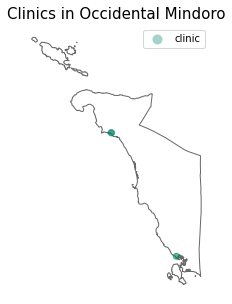

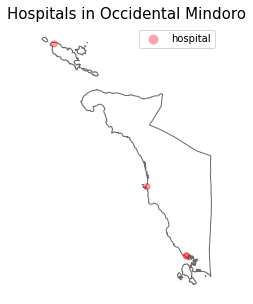

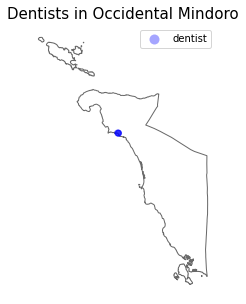

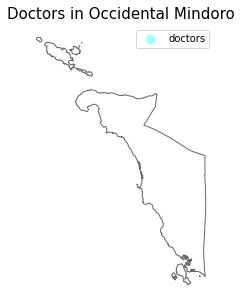

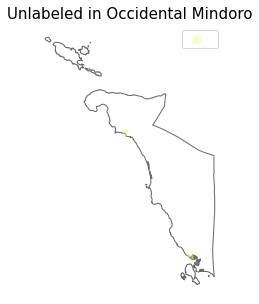

In [50]:
mm = ph[ph.NAME_1=="Occidental Mindoro"]

mm_within = gpd.sjoin(pharmacydata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="spring", alpha=0.35, legend=True)
ax.set_title('Pharmacies in Occidental Mindoro', fontsize=15)
ax.axis('off');

mm_within = gpd.sjoin(clinicdata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="summer", alpha=0.35, legend=True)
ax.set_title('Clinics in Occidental Mindoro', fontsize=15)
ax.axis('off');

mm_within = gpd.sjoin(hospitaldata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="autumn", alpha=0.35, legend=True)
ax.set_title('Hospitals in Occidental Mindoro', fontsize=15)
ax.axis('off');

mm_within = gpd.sjoin(dentistdata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="winter", alpha=0.35, legend=True)
ax.set_title('Dentists in Occidental Mindoro', fontsize=15)
ax.axis('off');

mm_within = gpd.sjoin(doctorsdata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="cool", alpha=0.35, legend=True)
ax.set_title('Doctors in Occidental Mindoro', fontsize=15)
ax.axis('off');

mm_within = gpd.sjoin(unkdata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="Wistia", alpha=0.35, legend=True)
ax.set_title('Unlabeled in Occidental Mindoro', fontsize=15)
ax.axis('off');

#0 Laboratories in Occidental Mindoro

#0 Social Facilities in Occidental Mindoro

#0 Healthcare in Occidental Mindoro

###Quezon

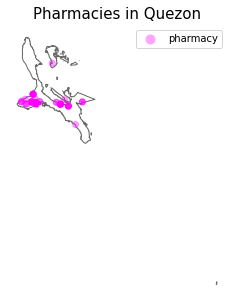

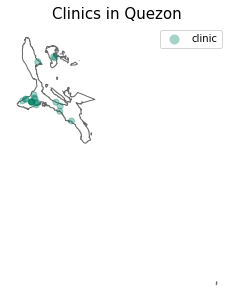

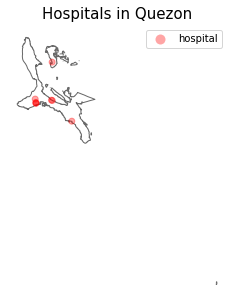

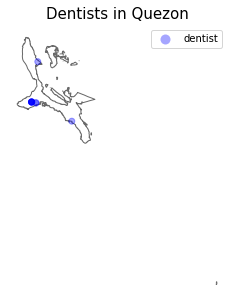

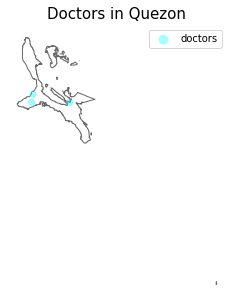

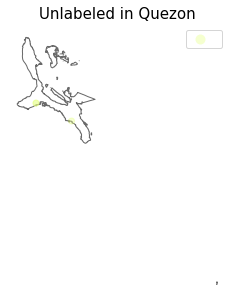

In [51]:
mm = ph[ph.NAME_1=="Quezon"]

mm_within = gpd.sjoin(pharmacydata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="spring", alpha=0.35, legend=True)
ax.set_title('Pharmacies in Quezon', fontsize=15)
ax.axis('off');

mm_within = gpd.sjoin(clinicdata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="summer", alpha=0.35, legend=True)
ax.set_title('Clinics in Quezon', fontsize=15)
ax.axis('off');

mm_within = gpd.sjoin(hospitaldata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="autumn", alpha=0.35, legend=True)
ax.set_title('Hospitals in Quezon', fontsize=15)
ax.axis('off');

mm_within = gpd.sjoin(dentistdata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="winter", alpha=0.35, legend=True)
ax.set_title('Dentists in Quezon', fontsize=15)
ax.axis('off');

mm_within = gpd.sjoin(doctorsdata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="cool", alpha=0.35, legend=True)
ax.set_title('Doctors in Quezon', fontsize=15)
ax.axis('off');

mm_within = gpd.sjoin(unkdata, mm, op='within')
mm_within= mm_within.reset_index(drop=True)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
mm.plot(ax=ax, color='white', edgecolor='dimgray')
mm_within.plot(ax=ax, column="amenity", cmap="Wistia", alpha=0.35, legend=True)
ax.set_title('Unlabeled in Quezon', fontsize=15)
ax.axis('off');

#0 Laboratories in Quezon

#0 Social Facilities in Quezon

#0 Healthcare in Quezon